eda:
در این مرحله با نگاهی کلی به دیتاست، وضعیت ویژگی‌ها و اهمیت و تاثیر آنها در یادگیری را بررسی می‌کنیم.


In [1]:
import seaborn as sns
import pandas as ps
import numpy as np


data = ps.read_csv("train_data.csv")

In [2]:
data.describe()

,displayId,timestamp,dayOfWeek,hourOfDay,advertiserId,campaignId,creativeId,publisher,widgetId,device,os,browser,source,docId,userId,clicked
count,3.768416e+06,3.768416e+06,3.768416e+06,3.768416e+06,3.768416e+06,3.768416e+06,3.768416e+06,3.768416e+06,3.768416e+06,3.768416e+06,3.768416e+06,3.768416e+06,3.768416e+06,3.768416e+06,3.768416e+06,3.768416e+06
mean,3.044210e+06,1.579005e+12,2.822654e+00,1.128271e+01,4.851426e+03,4.556158e+03,3.923456e+03,2.463082e+02,7.500866e+03,3.409207e-01,4.306032e-01,1.209916e+00,1.848337e+03,5.065981e+06,1.501631e+06,2.234841e-01
std,1.019521e+06,3.571385e+08,1.914881e+00,5.618726e+00,2.899004e+03,2.647040e+03,2.482294e+03,5.164171e+02,4.301190e+03,4.817837e-01,6.516009e-01,2.629931e+00,6.529483e+03,3.424284e+06,7.132266e+05,4.165801e-01
min,1.115095e+06,1.578429e+12,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+01,6.000000e+00,0.000000e+00,9.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,8.000000e+00,0.000000e+00
25%,2.175378e+06,1.578715e+12,1.000000e+00,7.000000e+00,2.167000e+03,2.329000e+03,1.012000e+03,1.100000e+01,3.637000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+01,5.285000e+05,9.327162e+05,0.000000e+00
50%,3.118769e+06,1.578971e+12,3.000000e+00,1.000000e+01,4.705000e+03,4.355000e+03,5.102000e+03,3.300000e+01,7.759000e+03,0.000000e+00,0.000000e+00,0.000000e+00,3.400000e+01,6.518645e+06,1.545785e+06,0.000000e+00
75%,3.894130e+06,1.579330e+12,4.000000e+00,1.600000e+01,7.291000e+03,6.850000e+03,5.930000e+03,1.160000e+02,1.149700e+04,1.000000e+00,1.000000e+00,1.000000e+00,1.600000e+02,7.735219e+06,2.109148e+06,0.000000e+00
max,4.706267e+06,1.579639e+12,6.000000e+00,2.300000e+01,1.074600e+04,9.523000e+03,7.268000e+03,2.551000e+03,1.436600e+04,3.000000e+00,6.000000e+00,1.020000e+02,4.037200e+04,9.692209e+06,2.688642e+06,1.000000e+00


ماتریس کوریلیشن بین ویژگی‌ها بدین گونه است:

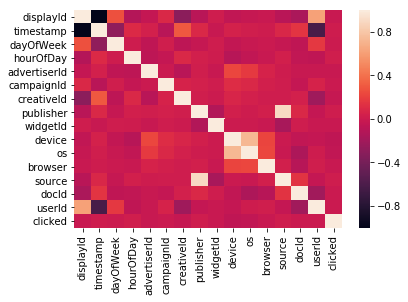

In [3]:
sns.heatmap(data.corr())

که در آن بین شناسه‌های کاربر، نمایش و زمان رابطه وجود دارد. البته که این رابطه کاذب است و به علت است که شناسه‌ها اعدادی صعودی اند و وا ورود کاربر در زمان‌های بعدی، شناسه‌های بزرگتری برای کاربر و نمایش به کاربر درنظر گرفته می‌شود.  

پس این روابط ارزشی در یادگیری ندارند. همچنین بین پلتفرم و سیستم‌عامل هم رابطه وجود دارد که مربوط به حوزه مطلوب ما نیست و دلایل معلوم دیگری دارد. منبع هم رابطه‌ای با منتشر کننده دارد که بنا به رابطه صفحات با سایت میزبان است و در صورتی که بخواهیم سایت‌ها را به تفکیک صفحات بررسی کنیم بدرد می‌خورد.

ویژگی شناسه کاربر را بررسی می‌کنیم:

(5.630821459309553, <matplotlib.axes._subplots.AxesSubplot at 0x1c6803f9cc0>)

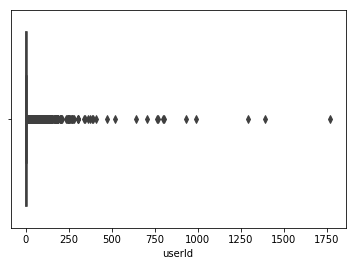

In [4]:
(np.mean(data.userId.value_counts()), sns.boxplot(data.userId.value_counts()))

می‌بینیم که از تعداد بسیار زیادی از کاربران داده‌های بسیار کمی دارم یعنی به‌طور کلی نمی‌توانیم .روی هر کابر تحلیل جداگانه بزنیم و احتمال مراجعه به تبلیغ را به طور جداگانه برای او پیدا کنیم. با توجه به رندم بودن این ویژگی، میتوانیم آن را کنار بگذاریم.  

حال ویژگی زمانی را بررسی می‌کنیم. تعداد یکتای این ویژگی بسیار بالاست و از نظر منطقی این ویژگی کمکی در یادگیری نمی‌کند. (مانند ویژگی زمان)

C:\Users\Utop\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


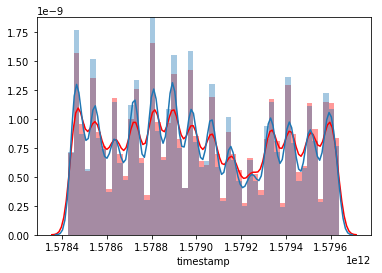

In [5]:
clicked = data[data.clicked==1]
unclicked = data[data.clicked==0]
sns.distplot(clicked.timestamp, color='red')
sns.distplot(unclicked.timestamp)


بنابر این تا اینجا ویژگی‌های زمان، شناسه‌ نمایش ، شناسه کاربر و سیستم‌عامل را کنار میگذاریم و استفاده ار ناشر بسته به انتخاب ما است. حال به سراغ ویژگی‌های زمان هفته و روز می‌رویم. نمودار تبلیغات کلیک شده و نشده برای هر ویژگی را رسم می‌کنیم:

In [7]:
clicked = data[data.clicked==1]
unclicked = data[data.clicked==0]
sns.histplot(clicked.hourOfDay)
sns.histplot(unclicked.hourOfDay)

AttributeError: module 'seaborn' has no attribute 'histplot'

In [8]:
clicked = data[data.clicked==1]
unclicked = data[data.clicked==0]
sns.histplot(clicked.dayOfWeek)
sns.histplot(unclicked.dayOfWeek)

AttributeError: module 'seaborn' has no attribute 'histplot'

می‌بینیم که نسبت تبلیغات مراجعه شده و نشده در روز‌ها و ساعت مختلف برابر است. یعنی این ویژگی اگر به نتهایی و جدا از دیگر ویژگی‌ها (مانند شناسه کاربر و محتوای تبلیغ) بررسی شود، کمکی نخواهد کرد. اما در روش ‌هایی که تاثیر مقادیر مختلف دو متغیر را در نظر می‌گیرد (مانند ماشین فکتوریزیشن) این ویژگی‌ها ممکن است به‌کار آید. زیرا ممکن است هر فرد در ساعات خاصی یا برای محتوا‌های خاصی بیشتر به تبلیغ‌مراجعه کند. (علایق و زمان‌های کاری افراد متفاوت است.)

svm:

In [9]:
from sklearn import svm
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3768416 entries, 0 to 3768415
Data columns (total 16 columns):
displayId       int64
timestamp       int64
dayOfWeek       int64
hourOfDay       int64
advertiserId    int64
campaignId      int64
creativeId      int64
publisher       int64
widgetId        int64
device          int64
os              int64
browser         int64
source          int64
docId           int64
userId          int64
clicked         int64
dtypes: int64(16)
memory usage: 460.0 MB


In [10]:
clsf = svm.SVC(kernel='linear', C=4)
classes = data['clicked']
# data = data.drop(columns=['displayId', 'timestamp', 'publisher', 'userId', 'browser', 'widgetId'])
newdata=data.drop(data.columns[[0, 1, 7, 8, 11, 14, 15]] , axis=1)
newdata.info()
# newdata[0:3]
clsf.fit(newdata[0:10], classes[0:10])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3768416 entries, 0 to 3768415
Data columns (total 9 columns):
dayOfWeek       int64
hourOfDay       int64
advertiserId    int64
campaignId      int64
creativeId      int64
device          int64
os              int64
source          int64
docId           int64
dtypes: int64(9)
memory usage: 258.8 MB


SVC(C=4, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

boosting:
بوستینگ یک فرا الگوریتم ترکیبی در حوزه یادگیری ماشین است که برای کاهش عدم توازن و همچنین واریانس به کار می‌رود. این روش در یادگیری با نظارت مورد استفاده قرار گرفته و از خانواده الگوریتم‌های یادگیری ماشین به شمار می‌رود. این تکنیک، روشی برای تبدیل سیستمهای یادگیری ضعیف به قوی بر اساس ترکیب نتایج طبقه بندهای مختلف است. ایده اولیه این روش بر اساس سؤال مطرح شده توسط کیرنس و شجاع (۱۹۸۸، ۱۹۸۹) به وجود آمده است: آیا می‌توان با ترکیب مجموعه‌ای از سیستم‌های یادگیری ضعیف یک سیستم یادگیری قوی ایجاد نمود؟

سیستم یادگیری ضعیف، یادگیرنده‌ای است که به عنوان یک طبقه بند، تنها کمی بهتر از حالت تصادفی عمل می‌نماید (برچسب نمونه‌ها را بهتر از تصادفی حدس می‌زند). در مقابل یادگیرنده قوی طبقه‌بندی است که به تنهایی می‌تواند برچسب نمونه‌ها را خوبی پیش بینی نماید.

In [12]:
data.describe()

,displayId,timestamp,dayOfWeek,hourOfDay,advertiserId,campaignId,creativeId,publisher,widgetId,device,os,browser,source,docId,userId,clicked
count,3.768416e+06,3.768416e+06,3.768416e+06,3.768416e+06,3.768416e+06,3.768416e+06,3.768416e+06,3.768416e+06,3.768416e+06,3.768416e+06,3.768416e+06,3.768416e+06,3.768416e+06,3.768416e+06,3.768416e+06,3.768416e+06
mean,3.044210e+06,1.579005e+12,2.822654e+00,1.128271e+01,4.851426e+03,4.556158e+03,3.923456e+03,2.463082e+02,7.500866e+03,3.409207e-01,4.306032e-01,1.209916e+00,1.848337e+03,5.065981e+06,1.501631e+06,2.234841e-01
std,1.019521e+06,3.571385e+08,1.914881e+00,5.618726e+00,2.899004e+03,2.647040e+03,2.482294e+03,5.164171e+02,4.301190e+03,4.817837e-01,6.516009e-01,2.629931e+00,6.529483e+03,3.424284e+06,7.132266e+05,4.165801e-01
min,1.115095e+06,1.578429e+12,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+01,6.000000e+00,0.000000e+00,9.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,8.000000e+00,0.000000e+00
25%,2.175378e+06,1.578715e+12,1.000000e+00,7.000000e+00,2.167000e+03,2.329000e+03,1.012000e+03,1.100000e+01,3.637000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+01,5.285000e+05,9.327162e+05,0.000000e+00
50%,3.118769e+06,1.578971e+12,3.000000e+00,1.000000e+01,4.705000e+03,4.355000e+03,5.102000e+03,3.300000e+01,7.759000e+03,0.000000e+00,0.000000e+00,0.000000e+00,3.400000e+01,6.518645e+06,1.545785e+06,0.000000e+00
75%,3.894130e+06,1.579330e+12,4.000000e+00,1.600000e+01,7.291000e+03,6.850000e+03,5.930000e+03,1.160000e+02,1.149700e+04,1.000000e+00,1.000000e+00,1.000000e+00,1.600000e+02,7.735219e+06,2.109148e+06,0.000000e+00
max,4.706267e+06,1.579639e+12,6.000000e+00,2.300000e+01,1.074600e+04,9.523000e+03,7.268000e+03,2.551000e+03,1.436600e+04,3.000000e+00,6.000000e+00,1.020000e+02,4.037200e+04,9.692209e+06,2.688642e+06,1.000000e+00


In [13]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
# Classification
clf_boosting = xgb.XGBClassifier(n_estimators=100, reg_lambda=1,reg_alpha=1, gamma=0, max_depth=None)
# n_estimator is num of gradient boosted trees # reg_alpha and reg_lmbda are regularization term # gamma is Minimum loss
classes_boosting = data['clicked']
# data = data.drop(columns=['displayId', 'timestamp', 'publisher', 'userId', 'browser', 'widgetId'])
newdata_boosting=data.drop(data.columns[[0, 1, 7, 8, 11, 14, 15]] , axis=1)
newdata_boosting.info()
# newdata[0:3]
clf_boosting.fit(newdata_boosting[0:10], classes_boosting[0:10])
# Prediction
#pred_y = clf.predict(test_x)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3768416 entries, 0 to 3768415
Data columns (total 9 columns):
dayOfWeek       int64
hourOfDay       int64
advertiserId    int64
campaignId      int64
creativeId      int64
device          int64
os              int64
source          int64
docId           int64
dtypes: int64(9)
memory usage: 258.8 MB


C:\Users\Utop\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:05:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=4, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=1,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       use_label_encoder=True, validate_parameters=1, verbosity=None)

random:

In [15]:
y = data["clicked"]
x = data.drop(data.columns[[0, 1, 7, 8, 11, 14, 15]] , axis=1)
x_test = x.iloc[0:int(0.2*len(x))]
x_train = x[int(0.2*len(x)):]
y_train = y[int(0.2*len(y)):]
y_test = y.iloc[0:int(0.2*len(y))]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
clf = RandomForestClassifier(n_estimators=1000,max_depth=3000)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("AUC : %.4f" %metrics.roc_auc_score(y_test, y_pred))
print("Cross-entropy loss : %.4f " %metrics.log_loss(y_test,y_pred))
print("F1 score : %.4f" %metrics.f1_score(y_test,y_pred,average="micro"))

C:\Users\Utop\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


logestic:

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,solver="saga",multi_class="ovr",max_iter=1000)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("AUC : %.4f" %metrics.roc_auc_score(y_test, y_pred))
print("Cross-entropy loss : %.4f " %metrics.log_loss(y_test,y_pred))
print("F1 score : %.4f" %metrics.f1_score(y_test,y_pred,average="micro"))